In [1]:
#!pip install mlflow==2

In [2]:
import pycaret
import mlflow
#mlflow.set_tracking_uri("http://localhost:5000")

In [3]:
import pycaret
pycaret.__version__

'3.2.0'

In [4]:
import pandas as pd
data = pd.read_csv('./data/raw_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# initialize setup
from pycaret.classification import *

s = setup(data, target = 'Churn', session_id = 123, 
          ignore_features = ['customerID'], 
          log_experiment = True, 
          experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7789,0.8060,0.7789,0.7727,0.7741,0.4110,0.4139,0.1530
knn,K Neighbors Classifier,0.7716,0.7792,0.7716,0.7642,0.7667,0.3912,0.3932,0.1970
lr,Logistic Regression,0.7550,0.8297,0.7550,0.7408,0.6890,0.1566,0.2285,0.9640
rf,Random Forest Classifier,0.7501,0.7778,0.7501,0.7130,0.6983,0.1819,0.2174,0.3050
svm,SVM - Linear Kernel,0.7462,0.0000,0.7462,0.7132,0.6917,0.2081,0.2471,0.1700
qda,Quadratic Discriminant Analysis,0.7410,0.7790,0.7410,0.6955,0.6798,0.1335,0.1687,0.1490
ridge,Ridge Classifier,0.7385,0.0000,0.7385,0.6907,0.6592,0.0793,0.1278,0.1440
lda,Linear Discriminant Analysis,0.7385,0.7335,0.7385,0.6907,0.6592,0.0793,0.1278,0.1510
et,Extra Trees Classifier,0.7379,0.7473,0.7379,0.6890,0.6710,0.1069,0.1467,0.2920
lightgbm,Light Gradient Boosting Machine,0.7349,0.7311,0.7349,0.7270,0.7271,0.2888,0.2942,0.2370


In [7]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


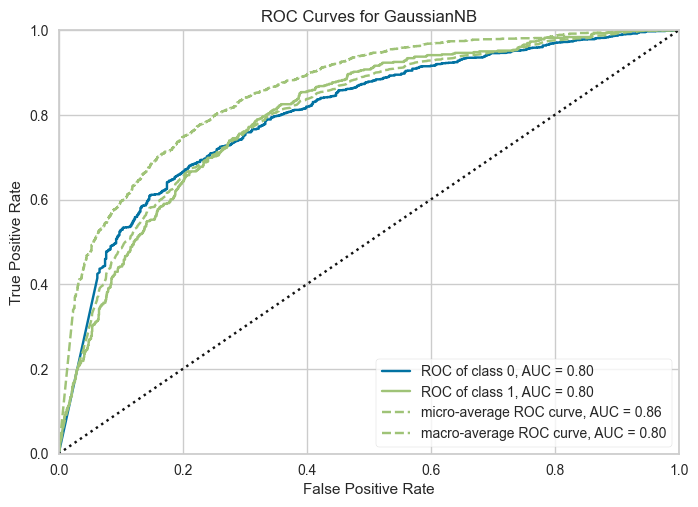

In [8]:
plot_model(best_model, plot = 'auc')

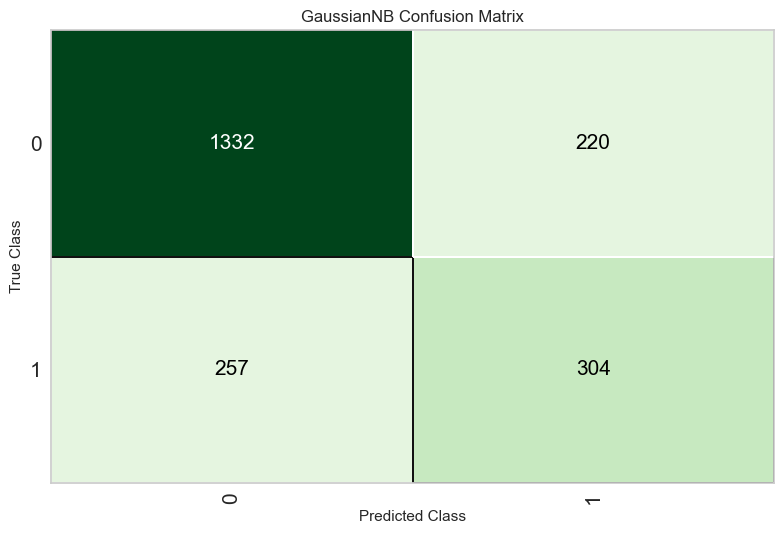

In [9]:
plot_model(best_model, plot = 'confusion_matrix')

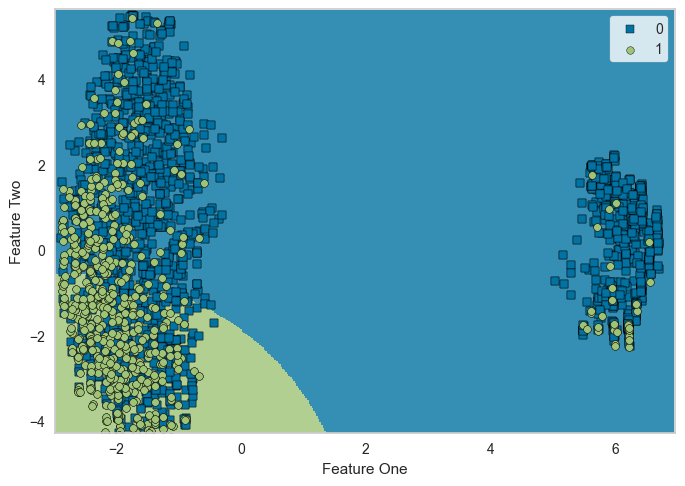

In [10]:
plot_model(best_model, plot = 'boundary')

In [11]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [13]:
# save pipeline
save_model(best_model, 'outputs\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['TotalCharges'],
                       

#### MLFlow UI

In [ ]:
# start the mlflow ui http://localhost:5000
!mlflow ui